In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=f7665376ca3a1ea933c36428d14bf40e3860f82f78d19c935db289450ff5b8df
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


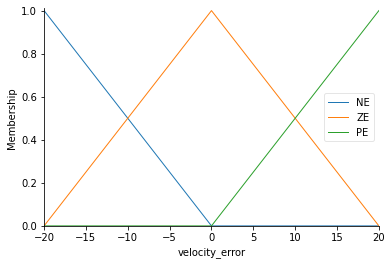

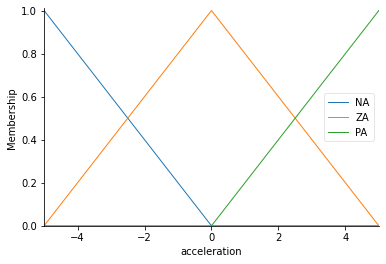

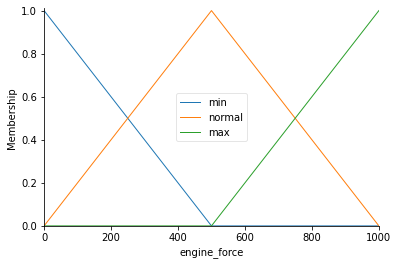

In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d

velocity_error = ctrl.Antecedent(np.arange(-20,21,1),'velocity_error')    
acceleration = ctrl.Antecedent(np.arange(-5,6,1),'acceleration')
engine_force = ctrl.Consequent(np.arange(0,1001,1),'engine_force')

velocity_error['NE']  = fuzz.trimf(velocity_error.universe,[-20,-20,0])  
velocity_error['ZE'] = fuzz.trimf(velocity_error.universe,[-20,0,20])  
velocity_error['PE'] = fuzz.trimf(velocity_error.universe,[0,20,20])  

acceleration['NA'] = fuzz.trimf(acceleration.universe,[-5,-5,0])  
acceleration['ZA'] = fuzz.trimf(acceleration.universe,[-5,0,5])  
acceleration['PA'] = fuzz.trimf(acceleration.universe,[0,5,5])  

engine_force['min'] = fuzz.trimf(engine_force.universe,[0,0,500])   
engine_force['normal'] = fuzz.trimf(engine_force.universe,[0,500,1000])         
engine_force['max'] = fuzz.trimf(engine_force.universe,[500,1000,1000])            
       
  
velocity_error.view()
acceleration.view()
engine_force.view()



225.55031446540397
499.36064152578905
514.7849462365593


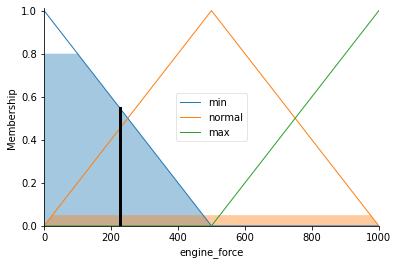

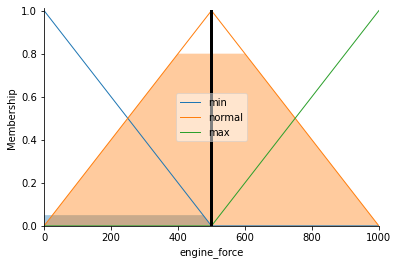

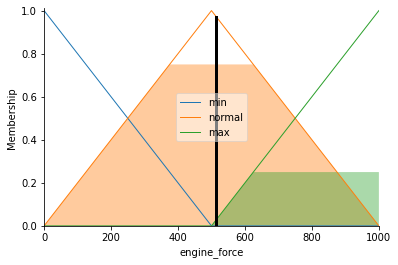

In [20]:
rule1 = ctrl.Rule(velocity_error['NE']&acceleration['NA'] ,engine_force['min'])
rule2 = ctrl.Rule(velocity_error['NE']&acceleration['ZA'] ,engine_force['min'])
rule3 = ctrl.Rule(velocity_error['NE']&acceleration['PA'] ,engine_force['min'])

rule4 = ctrl.Rule(velocity_error['ZE']&acceleration['NA'],engine_force['normal'])
rule5 = ctrl.Rule(velocity_error['ZE']&acceleration['ZA'],engine_force['normal'])
rule6 = ctrl.Rule(velocity_error['ZE']&acceleration['PA'],engine_force['normal'])

rule7 = ctrl.Rule(velocity_error['PE']&acceleration['NA'],engine_force['max'])
rule8 = ctrl.Rule(velocity_error['PE']&acceleration['ZA'],engine_force['max'])
rule9 = ctrl.Rule(velocity_error['PE']&acceleration['PA'],engine_force['max'])


engine_force1_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
engine_force1 = ctrl.ControlSystemSimulation(engine_force1_ctrl)
engine_force1.input['velocity_error']=-19
engine_force1.input['acceleration']=-4
engine_force1.compute()
print(engine_force1.output['engine_force'])
engine_force.view(sim=engine_force1)

engine_force1_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
engine_force1 = ctrl.ControlSystemSimulation(engine_force1_ctrl)
engine_force1.input['velocity_error']=-1
engine_force1.input['acceleration']=1
engine_force1.compute()
print(engine_force1.output['engine_force'])
engine_force.view(sim=engine_force1)



engine_force1_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
engine_force1 = ctrl.ControlSystemSimulation(engine_force1_ctrl)
engine_force1.input['velocity_error']=5
engine_force1.input['acceleration']= 19
engine_force1.compute()
print(engine_force1.output['engine_force'])
engine_force.view(sim=engine_force1)


<ipython-input-6-954e511a6792>:17: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
<ipython-input-6-954e511a6792>:18: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=9,cmap='viridis',anpha=0.5)
<ipython-input-6-954e511a6792>:19: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=9,cmap='viridis',anpha=0.5)


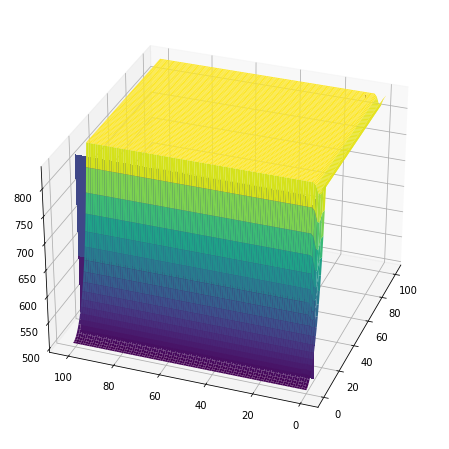

In [6]:
system = ctrl.ControlSystem(rules =[rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
sim = ctrl.ControlSystemSimulation(system,flush_after_run = 101*101+1)
unsampled = np.linspace(0,101,101)
x,y = np.meshgrid(unsampled,unsampled)
z = np.zeros_like(x)

for i in range(101):
  for j in range(101): 
    sim.input['velocity_error'] = x[i,j]
    sim.input['acceleration'] = y[i,j]
    sim.compute() 
    z[i,j] = sim.output['engine_force']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=9,cmap='viridis',anpha=0.5)
ax.view_init(30,200)